<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M4_AST_05_Optimization_methods_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IITM and TalentSprint - part of Accenture
### Assignment 05 Optimization methods

### Setup Steps:

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M4_AST_05_Optimization_methods_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword(),"batch":"IITM-PG-ADSML-07"}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support,"batch":"IITM-PG-ADSML-07"}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Learning Objectives

This tutorial provides an overview of various popular (and not only) optimizers that are used in machine and deep learning, in particular for training neural networks. We will look at their main idea and key features, moving from simple to more complex concepts. In addition, at the end you will be able to find a large number of additional sources for a more detailed acquaintance with the material.

In [5]:
#@title Dataset download
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ3ejdvn2dxV6lmWsaxggCHJjFEAot6GCRv7GzD7PlbaTU_7-hmg8bW5nKJe47CZdRL2Yscn5llWfyK/pub?gid=868111795&single=true&output=csv"

df = pd.read_csv(csv_url)
df.to_csv('BostonHousing.csv', index=False)


# **Classic gradient descent**

To begin with, if the gradient is the vector of the fastest increase in the function, then the antigradient is the vector of the fastest decrease, and it is when moving in this direction that the minimum error of the model will be located. Then gradient descent can be defined as a numerical iterative optimization method for finding the weights (coefficients) of a model by minimizing its error, represented as a loss function.

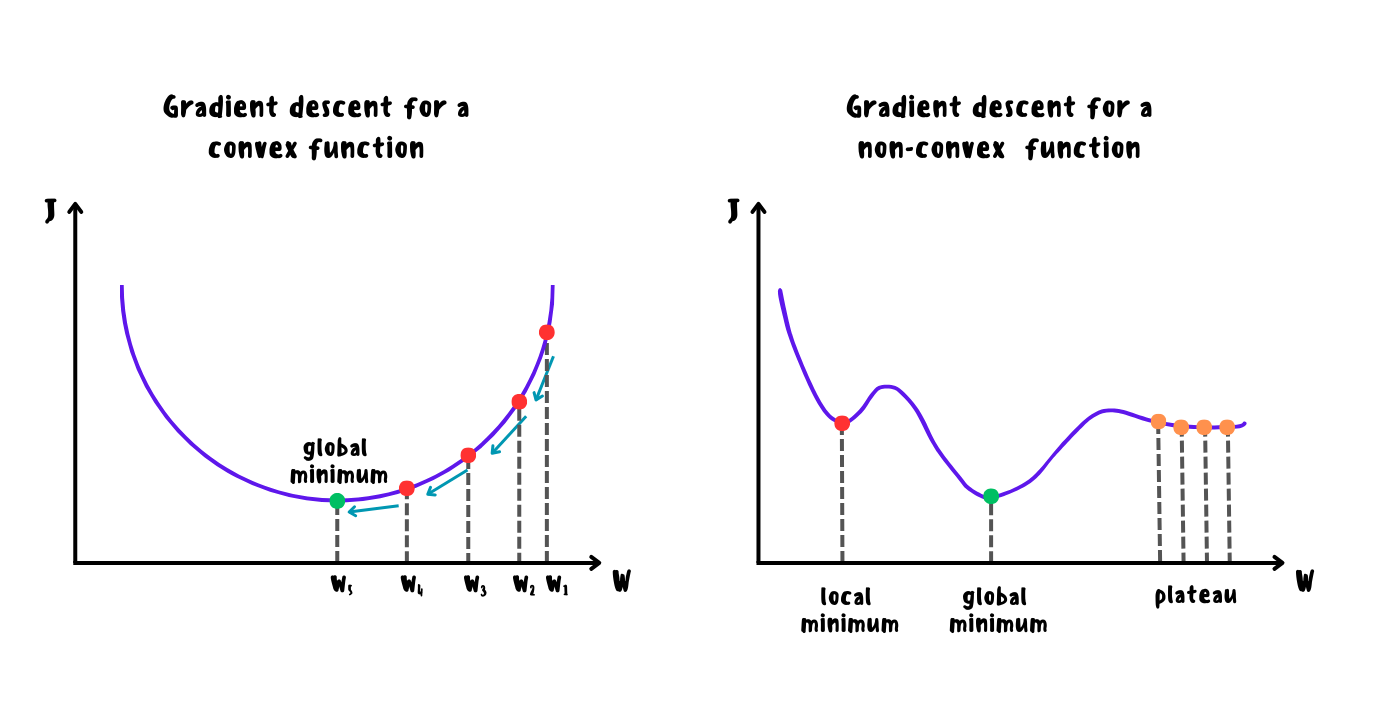

**The algorithm is constructed as follows:**
- 1) initially, weights with zero values are initialized;
- 2) then, based on the set weights, the model makes a prediction;
- 3) based on the obtained prediction, the error gradient is calculated, after which the weights are updated towards the anti-gradient of the loss function;
- 4) steps 2-3 are repeated until the gradient becomes zero, that is, until the algorithm converges to a minimum (as a rule, in this case, a stop criterion is used, for example, until the gradient difference in the current and previous iterations becomes less than a predetermined threshold value).

If a complete training set is used to calculate the gradients of the loss function, then a such gradient descent is called **batch**. Despite the fact that batch gradient descent is almost always well scaled in terms of the number of features, this algorithm works very slowly on large datasets and requires significant costs in the form of additional memory to store all gradients.

To increase performance on large datasets, 2 approaches are used:
- 1) **Mini-batch** gradient descent, when at each step the gradients are calculated on small random subsets (mini-packages). Usually, the size of a mini-batch is taken in the form of $2^n$ and can reach several tens of thousands of samples: the choice of size depends on the specifics of the task and the model used.

- 2) **Stochastic** gradient descent, when only one sample is taken from the training set at each step. Obviously, this option should work much faster than the previous one, but on the other hand, due to its even more stochastic nature, this algorithm is less stable and may require more iterations for convergence, as well as mini-batch gives an increase in performance due to hardware optimization of matrix calculations on the GPU. It is also worth noting that at the moment, stochastic gradient descent is very often referred to as a mini-batch.

Unlike batch gradient descent, in these cases the loss function will decrease in jumps up and down, approaching the minimum, but never reaching it. In the case of mini-batch gradient descent, the loss function will be located slightly closer to the minimum due to the smaller size of the jumps. On the other hand, unlike stochastic gradient descent, it may be more difficult for it to pass local minima in the non-convex case.

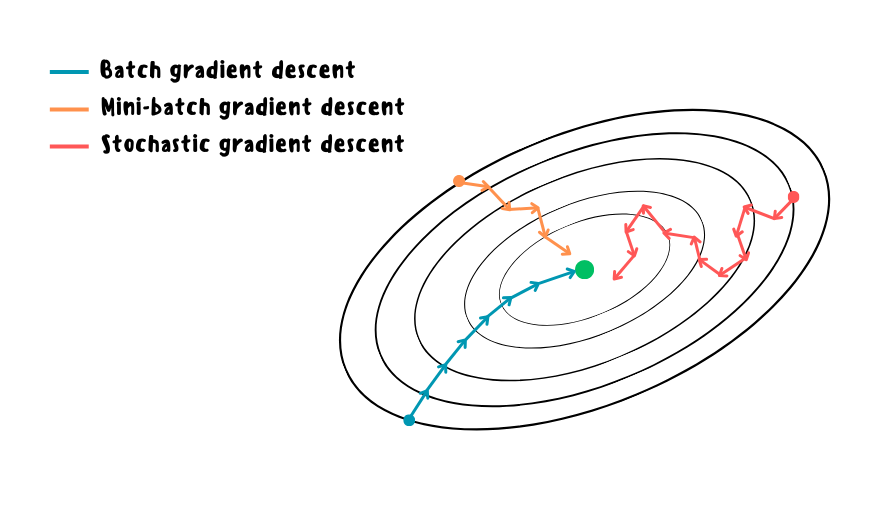

# **Training and visualization of optimizers**

For clarity, let's look at a small example of how various optimizers work on a Boston Housing dataset. First, we will create a simple neural network in Pytorch and train it on all the training data, on which we will then evaluate the reduction in optimizers losses at each iteration. Also, for Keras fans, we will train a simple neural network on mini-packages, but we will already evaluate the losses reduction on the test set.

**Downloading and preparing the dataset**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_path = "/content/BostonHousing.csv"
boston = pd.read_csv(df_path)
print(boston)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [7]:
print(boston.isna().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


### **Data Cleaning, Splitting, and Standardization of the Boston Housing Dataset**

The below code prepares the Boston housing dataset for machine learning by first removing any missing values, then separating the features and target variable. The data is split into training and testing sets, and the feature values are standardized using z-score normalization. Standardization ensures that all input features have the same scale, improving model performance and training stability.

In [8]:
boston.dropna(inplace=True)

X, y = boston.iloc[:, :-1].values, boston.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)

**Keras optimizers based on training data**

In [9]:
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import set_random_seed

### **Creating a Custom Keras Neural Network Model**

#### This function builds and compiles a fully connected feed-forward neural network using Keras. It takes the optimizer, input feature size, hidden layer sizes, and output size as arguments. The model consists of two ReLU-activated hidden layers and a final linear output layer, optimized using mean squared error (MSE) loss.

In [10]:
def create_keras_nn(optimizer, in_features, h1, h2, out):
    model = Sequential()
    model.add(Dense(input_shape=(in_features,), units=h1, activation='relu'))
    model.add(Dense(input_shape=(h1,), units=h2, activation='relu'))
    model.add(Dense(units=out))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

    return model

### **Training Neural Networks with Multiple Optimizers and Tracking Validation Loss**

#### This function trains the same Keras neural network using different optimizers and records the validation loss for each one. For every optimizer, a fresh model is created, trained on the training data, and evaluated on the test data. The function returns a list of tuples containing the optimizer name and its corresponding validation-loss history.

In [11]:
def keras_losses(train_data, test_data, optimizers, nn_params, num_epochs=10):
    losses = []
    X_train, y_train = train_data
    X_test, y_test = test_data

    for name, optimizer in optimizers:
        model = create_keras_nn(optimizer, **nn_params)
        model_history = model.fit(X_train, y_train, batch_size=32, epochs=num_epochs,
                                  verbose=0, validation_data=(X_test, y_test))
        losses.append((name, model_history.history['val_loss']))

    return losses

### **Defining a List of Keras Optimizers**

This section fixes the random seed for reproducibility and defines a collection of commonly used Keras optimizers—SGD, Momentum, Adagrad, RMSprop, and Adam—each with specified learning rates. These optimizers will be used to compare training performance of the neural network.

# **AdaGrad**
Adaptive Gradient is one of the first optimizations of gradient descent with adaptive step, in which the gradient decreases along the steepest directions. Simply put, at each step, the model parameters are updated taking into account the values of both the previous gradients and their squares.

**Algorithm for updating AdaGrad parameters**

$s_t \leftarrow s_{t-1} + dw_{t-1}^2$

$w_t \leftarrow w_{t-1} - \frac{\alpha}{\sqrt{s_t + \epsilon}} dw_{t-1}$

$\epsilon = 1e-8 \ - \ $ smoothing parameter to avoid division by zero

This simple approach allows the algorithm to start training quickly and then slow it down when the gradient gets smaller or changes a sign. However, in practice, AdaGrad copes well with convex cases, but when training neural networks, it often stops too early due to a rapid decrease in learning rate, without reaching the global optimum.

# **RMSProp**
RMSProp (Root Mean Square Propagation) is a modification of AdaGrad adapted to work better in the non-convex case. The main idea is to change the way the gradient is aggregated to an exponentially weighted moving average. In other words, instead of accumulating all the squares of the gradient from the beginning of training, the squares of the gradient accumulate only from the most recent iterations.

**The algorithm for updating the RMSProp parameters**

$s_t \leftarrow \beta s_{t-1} + (1 - \beta) dw_{t-1}^2$

$w_t \leftarrow w_{t-1} - \frac{\alpha}{\sqrt s_t + \epsilon} dw_{t-1}$

In general, RMSProp is an extremely effective optimization, but not the best one. For example, training difficulties may arise in multidimensional spaces due to problems scaling gradients in different directions.

# **Adam and its modifications**
Adam (Adaptive Moment Estimation) combines the concepts of Momentum and RMSProp, practically being a silver bullet in stochastic optimization problems. As you can see, the calculation of momentums in Adam is very similar to Momentum and RMSProp, except that an bias correction is applied to them. In general, thanks to such improvements, Adam converges faster and better than its predecessors, as well as is more resistant to the selection of hyperparameters, which makes it a more stable solution in most cases.

**Adam parameter update algorithm**

$v_t \leftarrow \beta_1 v_{t-1} + (1 - \beta_1) dw_{t-1}$

$s_t \leftarrow \beta_2 s_{t-1} + (1 - \beta_2) dw_{t-1}^2$

$w_t \leftarrow w_{t-1}  - \alpha \frac{v_t}{\sqrt s_t + \epsilon}$

$v_t \leftarrow \frac{v_t}{1 - \beta_1^t}\ - \ $ bias correction

$s_t \leftarrow \frac{s_t}{1 - \beta_2^t}\ - \ $ bias correction

$\beta_1 = 0.9, \ \ \beta_2 = 0.99 \ \ $ by default

On the other hand, this algorithm is more complex in analysis and can be sensitive to noise, which can lead to problems with convergence, and it also requires large amounts of memory, since it stores not only model parameters, but also information about gradients and accumulated momentum. In addition, Adam and all previous algorithms have another unpleasant drawback: if you continue training the model after an interruption at some point, you will have to restore not only the weights of the model from this point, but also all the information about the accumulated parameters.

In [12]:
set_random_seed(0)

keras_optimizers = [
    ('SGD', optimizers.SGD(learning_rate=0.001)),
    ('Momentum', optimizers.SGD(learning_rate=0.001, momentum=0.9)),
    ('Adagrad', optimizers.Adagrad(learning_rate=0.01)),
    ('RMSprop', optimizers.RMSprop(learning_rate=0.01)),
    ('Adam', optimizers.Adam(learning_rate=0.01))
    ]

### **Visualizing Validation Loss Across Different Keras Optimizers**

This block trains the neural network using multiple optimizers and plots their validation-loss curves over epochs. The resulting graph helps compare how each optimizer performs on the test data, revealing differences in convergence speed and stability.

In [13]:
nn_params = {'in_features': X.shape[1], 'h1': 16, 'h2': 8, 'out': 1}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


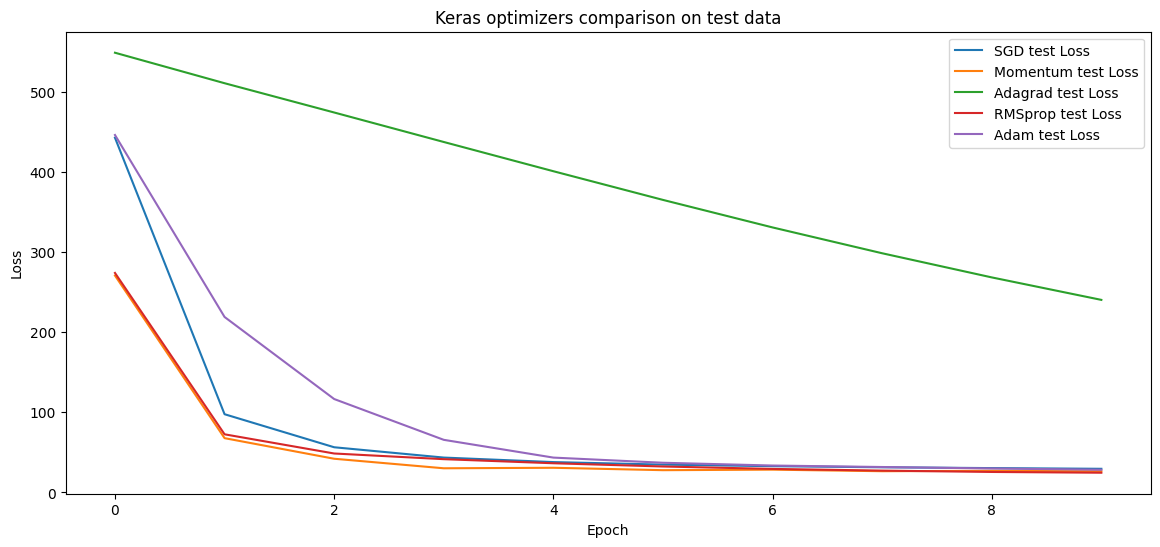

In [14]:
plt.figure(figsize=(14, 6))

k_losses = keras_losses((X_train_s, y_train), (X_test_s, y_test), keras_optimizers, nn_params)

for name, k_loss in k_losses:
    plt.plot(k_loss, label=name + ' test Loss')

plt.title('Keras optimizers comparison on test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Please answer the questions below to complete the experiment:




In [15]:
# @title Which of the following statements correctly describes how the AdaGrad optimization algorithm updates model parameters? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "AdaGrad adapts the learning rate for each parameter by accumulating the squared gradients over time, causing the learning rate to shrink more in directions with steep gradients." #@param  ["","AdaGrad uses a fixed learning rate and updates parameters using only the current gradient, ignoring all previous gradients.", "AdaGrad adapts the learning rate for each parameter by accumulating the squared gradients over time, causing the learning rate to shrink more in directions with steep gradients.", "AdaGrad increases the learning rate over time by accumulating the raw (non-squared) gradients.","AdaGrad updates parameters using momentum to average gradients over time, allowing faster movement in consistent directions."]

In [16]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [17]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}

In [18]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [19]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [20]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [21]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1816
Date of submission:  20 Dec 2025
Time of submission:  09:30:01
View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions
